In [1]:
!pip install nilearn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.4/10.4 MB 21.4 MB/s eta 0:00:00


In [2]:
import os
from nilearn import plotting
from nilearn import image
from nilearn.image import load_img
import numpy as np
import matplotlib.pyplot as plt
from nilearn import datasets
from nilearn.maskers import NiftiLabelsMasker
from nilearn.connectome import ConnectivityMeasure
from nilearn.regions import connected_label_regions
import nibabel as nib
import pandas as pd
from sklearn import svm
from sklearn import metrics

In [3]:
# importamos la data en csv:
from google.colab import drive
drive.mount('/content/drive') # directorio de todas las carpetas

os.chdir("/content/drive/MyDrive/intento_cosas")
luteo = r'/content/drive/MyDrive/intento_cosas/features_reho_lut.csv'
menstr = r'/content/drive/MyDrive/intento_cosas/features_reho_men.csv'
prolif = r'/content/drive/MyDrive/intento_cosas/features_reho_pro.csv'

Mounted at /content/drive


In [4]:
data_lut = pd.read_csv(luteo, index_col=0)
data_lut = data_lut.sort_values(['file_name'])
data_lut

,cortical_mean_4,cortical_mean_5,cortical_mean_6,cortical_mean_11,cortical_mean_12,cortical_mean_13,cortical_mean_21,cortical_mean_31,cortical_std_4,cortical_std_5,...,subcortical_mean_19,subcortical_mean_20,subcortical_std_4,subcortical_std_5,subcortical_std_9,subcortical_std_10,subcortical_std_15,subcortical_std_16,subcortical_std_19,subcortical_std_20
file_name,,,,,,,,,,,,,,,,,,,,,
reho_103515_01.nii.gz,0.122129,0.155236,0.147480,0.161859,0.159138,0.124449,0.160969,0.152143,0.0,0.0,...,0.121427,0.108368,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
reho_103515_02.nii.gz,0.108431,0.142732,0.138872,0.141020,0.140489,0.110429,0.152252,0.150748,0.0,0.0,...,0.113496,0.101838,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
reho_103515_03.nii.gz,0.121137,0.159758,0.149584,0.139687,0.147143,0.116668,0.158832,0.157350,0.0,0.0,...,0.117161,0.100412,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
reho_104820_01.nii.gz,0.111334,0.094647,0.116148,0.117054,0.119067,0.107608,0.099696,0.137177,0.0,0.0,...,0.079130,0.058866,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
reho_104820_02.nii.gz,0.105817,0.097145,0.110656,0.117269,0.109086,0.101312,0.108240,0.137909,0.0,0.0,...,0.073499,0.060061,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
reho_809252_02.nii.gz,0.123669,0.091690,0.094097,0.109372,0.120696,0.103101,0.114692,0.112059,0.0,0.0,...,0.073097,0.067258,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
reho_809252_03.nii.gz,0.117235,0.081955,0.086162,0.118741,0.115960,0.101648,0.120450,0.106665,0.0,0.0,...,0.072815,0.065078,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
reho_822244_01.nii.gz,0.087513,0.094301,0.110220,0.129268,0.124599,0.108302,0.142186,0.106149,0.0,0.0,...,0.066952,0.065244,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [5]:
data_men = pd.read_csv(menstr, index_col=0)
data_men = data_men.sort_values(['file_name'])
data_men

,cortical_mean_4,cortical_mean_5,cortical_mean_6,cortical_mean_11,cortical_mean_12,cortical_mean_13,cortical_mean_21,cortical_mean_31,cortical_std_4,cortical_std_5,...,subcortical_mean_19,subcortical_mean_20,subcortical_std_4,subcortical_std_5,subcortical_std_9,subcortical_std_10,subcortical_std_15,subcortical_std_16,subcortical_std_19,subcortical_std_20
file_name,,,,,,,,,,,,,,,,,,,,,
combined_mask.nii.gz,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.0,0.0,...,1.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
reho_114823_01.nii.gz,0.100664,0.094352,0.106090,0.116728,0.144049,0.094768,0.130484,0.101263,0.0,0.0,...,0.098427,0.069227,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
reho_114823_02.nii.gz,0.112314,0.098030,0.109451,0.117455,0.129185,0.101646,0.147006,0.111624,0.0,0.0,...,0.087610,0.061110,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
reho_114823_03.nii.gz,0.116644,0.097421,0.105420,0.110328,0.132022,0.096333,0.125931,0.106618,0.0,0.0,...,0.083172,0.063203,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
reho_117122_01.nii.gz,0.138916,0.162273,0.128460,0.138647,0.118907,0.145472,0.130137,0.117383,0.0,0.0,...,0.104437,0.093483,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
reho_861456_02.nii.gz,0.078060,0.114289,0.123441,0.123920,0.131625,0.142811,0.145528,0.183072,0.0,0.0,...,0.110756,0.115826,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
reho_861456_03.nii.gz,0.107188,0.130499,0.161572,0.133581,0.146838,0.145355,0.181792,0.275408,0.0,0.0,...,0.117010,0.106985,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
reho_902242_01.nii.gz,0.207661,0.190744,0.136210,0.167608,0.102535,0.112802,0.107941,0.090335,0.0,0.0,...,0.073675,0.058402,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [6]:
data_pr = pd.read_csv(prolif, index_col=0)
data_pr = data_pr.sort_values(['file_name'])
data_pr

,cortical_mean_4,cortical_mean_5,cortical_mean_6,cortical_mean_11,cortical_mean_12,cortical_mean_13,cortical_mean_21,cortical_mean_31,cortical_std_4,cortical_std_5,...,subcortical_mean_19,subcortical_mean_20,subcortical_std_4,subcortical_std_5,subcortical_std_9,subcortical_std_10,subcortical_std_15,subcortical_std_16,subcortical_std_19,subcortical_std_20
file_name,,,,,,,,,,,,,,,,,,,,,
reho_101915_01.nii.gz,0.097832,0.083878,0.106819,0.087759,0.101736,0.122947,0.111608,0.118987,0.0,0.0,...,0.072921,0.058993,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
reho_101915_02.nii.gz,0.105299,0.083008,0.125611,0.099260,0.120688,0.116339,0.135988,0.142533,0.0,0.0,...,0.080057,0.059666,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
reho_101915_03.nii.gz,0.134313,0.114471,0.171469,0.096327,0.124612,0.144752,0.173951,0.187616,0.0,0.0,...,0.092968,0.057992,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
reho_128632_01.nii.gz,0.155004,0.158129,0.134681,0.113819,0.136087,0.128675,0.135052,0.141533,0.0,0.0,...,0.091098,0.083380,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
reho_128632_02.nii.gz,0.144354,0.147721,0.139867,0.124167,0.150404,0.132285,0.171265,0.160945,0.0,0.0,...,0.089620,0.073080,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
reho_987983_02.nii.gz,0.112089,0.125441,0.127111,0.117189,0.111726,0.120554,0.136919,0.105616,0.0,0.0,...,0.055566,0.072614,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
reho_987983_03.nii.gz,0.105471,0.120274,0.127586,0.114480,0.112678,0.119963,0.148691,0.107004,0.0,0.0,...,0.050547,0.072001,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
reho_993675_01.nii.gz,0.093215,0.111189,0.110474,0.109223,0.122532,0.117435,0.116352,0.078673,0.0,0.0,...,0.079801,0.068953,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [7]:
from sklearn.model_selection import train_test_split

# 2. Añadir una columna que indique el grupo al que pertenece cada muestra
data_men['group'] = '0'
data_pr['group'] = '1'
data_lut['group'] = '2'

# 2. Definir función para tomar el primer tercio de un DataFrame
mens = 21*3 #int(len(data_men)*0.7)
prlof = 25*3 #int(len(data_pr)*0.7)
lut = 25*3 #int(len(data_lut)*0.7)

# 3. Tomar solo el primer tercio de cada grupo
data_men_train = data_men.iloc[:mens]
data_pr_train = data_pr.iloc[:prlof]
data_lut_train = data_lut.iloc[:lut]

data_men_test = data_men.iloc[mens:]
data_pr_test = data_pr.iloc[prlof:]
data_lut_test = data_lut.iloc[lut:]

df_all = pd.concat([data_men, data_pr, data_lut], ignore_index=True)
X = df_all.drop(columns=['group'])  # Eliminar la columna de grupo para usar solo las features
y = df_all['group']  # Esta será nuestra etiqueta

# 4. Añadir una columna que indique el grupo al que pertenece cada muestra
#data_men['group'] = 'menstrual'
#data_pr['group'] = 'proliferativo'
#data_lut['group'] = 'luteo'

# 5. Concatenar todos los datos en un solo DataFrame
df_all_train = pd.concat([data_men_train, data_pr_train, data_lut_train], ignore_index=True)
df_all_test = pd.concat([data_men_test, data_pr_test, data_lut_test], ignore_index=True)

# 6. Definir las características (X) y la etiqueta/grupo (y)
X_train = df_all_train.drop(columns=['group'])  # Eliminar la columna de grupo para usar solo las features
y_train = df_all_train['group']  # Esta será nuestra etiqueta

X_test = df_all_test.drop(columns=['group'])  # Eliminar la columna de grupo para usar solo las features
y_test = df_all_test['group']  # Esta será nuestra etiqueta

# 8. Ahora tienes tus sets de entrenamiento y testeo con el primer tercio de cada grupo:
print(f"Conjunto de entrenamiento: {X_train.shape[0]} muestras")
print(f"Conjunto de testeo: {X_test.shape[0]} muestras")


Conjunto de entrenamiento: 213 muestras
Conjunto de testeo: 70 muestras


In [8]:
print(X_train, y_train)
print(X_test, y_test)

     cortical_mean_4  cortical_mean_5  cortical_mean_6  cortical_mean_11  \
0           1.000000         1.000000         0.000000          1.000000   
1           0.100664         0.094352         0.106090          0.116728   
2           0.112314         0.098030         0.109451          0.117455   
3           0.116644         0.097421         0.105420          0.110328   
4           0.138916         0.162273         0.128460          0.138647   
..               ...              ...              ...               ...   
208         0.107545         0.115836         0.102804          0.082434   
209         0.093384         0.107007         0.104644          0.082593   
210         0.091015         0.092241         0.099035          0.123750   
211         0.096224         0.103995         0.098406          0.124080   
212         0.094472         0.099059         0.093932          0.121447   

     cortical_mean_12  cortical_mean_13  cortical_mean_21  cortical_mean_31  \
0       

# Falta colocar el label de la data, no parece haber funcionado lo anterior para el gráfico siguiente:

In [9]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler() # escala los datos para tener una media 0 y desviación estándar 1
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print(X_train_scaled)

[[13.43261205 13.09775313 -5.0647826  ...  0.          0.
   0.        ]
 [-0.29675736 -0.43049635 -0.65676502 ...  0.          0.
   0.        ]
 [-0.1189102  -0.37555679 -0.51708604 ...  0.          0.
   0.        ]
 ...
 [-0.44406445 -0.46203003 -0.9498902  ...  0.          0.
   0.        ]
 [-0.36453957 -0.28644252 -0.97601018 ...  0.          0.
   0.        ]
 [-0.39128344 -0.36018459 -1.16190215 ...  0.          0.
   0.        ]]


In [10]:
import numpy as np

# Asegúrate de que los índices de y_train y X_train_scaled coincidan
y_train = y_train.reset_index(drop=True)

# Escalar los datos de X_train
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

# Convertir X_train_scaled a DataFrame para facilitar la manipulación de índices
X_train_scaled = pd.DataFrame(X_train_scaled)
print(X_train_scaled)


            0          1         2          3          4         5         6   \
0    13.432612  13.097753 -5.064783  13.954237  13.711429 -4.434195 -5.592609   
1    -0.296757  -0.430496 -0.656765  -0.070572   0.200463 -0.705861 -0.129417   
2    -0.118910  -0.375557 -0.517086  -0.059017  -0.034151 -0.435252  0.562313   
3    -0.052812  -0.384655 -0.684581  -0.172185   0.010625 -0.644274 -0.320037   
4     0.287204   0.584093  0.272749   0.277467  -0.196398  1.288930 -0.143949   
..         ...        ...       ...        ...        ...       ...       ...   
208  -0.191713  -0.109568 -0.793259  -0.615096  -0.748981 -0.686907 -1.520158   
209  -0.407894  -0.241458 -0.716811  -0.612576  -0.735434 -0.648190 -1.090337   
210  -0.444064  -0.462030 -0.949890   0.040932  -0.046241  0.579949 -0.863725   
211  -0.364540  -0.286443 -0.976010   0.046168  -0.083891  0.579862 -0.953503   
212  -0.391283  -0.360185 -1.161902   0.004359  -0.157231  0.637852 -0.842000   

           7    8    9   ..

In [11]:
# Definir los índices correspondientes a cada grupo
grupo_1_indices = np.arange(0, mens) #np.arange(0, 51)   # Primer grupo (y_train = 0)
grupo_2_indices = np.arange(mens, mens +prlof) #np.arange(51, 132) # Segundo grupo (y_train = 1)
grupo_3_indices = np.arange(mens + prlof, mens + prlof + lut) #np.arange(132, 196) # Tercer grupo (y_train = 2)

# Extraer los subconjuntos de X_train_scaled correspondientes a cada grupo
grupo_1 = X_train_scaled.iloc[grupo_1_indices]
grupo_2 = X_train_scaled.iloc[grupo_2_indices]
grupo_3 = X_train_scaled.iloc[grupo_3_indices]

# Imprimir los grupos
print("Grupo 1 (y_train = 0):")
print(grupo_1)

print("\nGrupo 2 (y_train = 1):")
print(grupo_2)

print("\nGrupo 3 (y_train = 2):")
print(grupo_3)


Grupo 1 (y_train = 0):
           0          1         2          3          4         5         6   \
0   13.432612  13.097753 -5.064783  13.954237  13.711429 -4.434195 -5.592609   
1   -0.296757  -0.430496 -0.656765  -0.070572   0.200463 -0.705861 -0.129417   
2   -0.118910  -0.375557 -0.517086  -0.059017  -0.034151 -0.435252  0.562313   
3   -0.052812  -0.384655 -0.684581  -0.172185   0.010625 -0.644274 -0.320037   
4    0.287204   0.584093  0.272749   0.277467  -0.196398  1.288930 -0.143949   
..        ...        ...       ...        ...        ...       ...       ...   
58  -0.531742  -0.458993 -1.353142  -0.460387  -0.538215 -0.554419 -2.061279   
59  -0.416123  -0.285353 -1.153941  -0.457040  -0.295557 -0.682168 -1.057140   
60  -0.284278  -0.333758 -1.225290  -0.251284  -0.081182 -0.464745 -0.594470   
61  -0.344812  -0.645008 -1.768314  -0.637548  -0.422038 -0.636679 -1.993534   
62  -0.489127  -0.675807 -1.979414  -0.578377  -0.293888 -0.798043 -1.485352   

          7    8

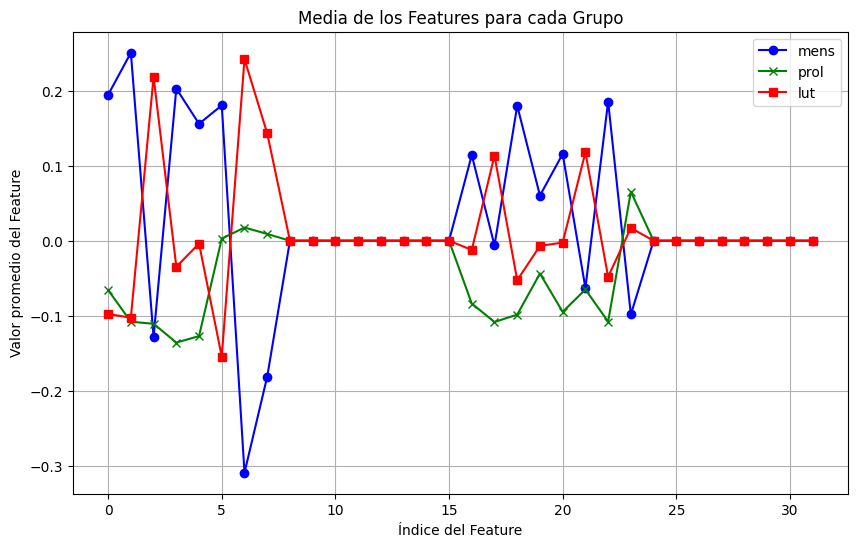

In [12]:
import pandas as pd
import matplotlib.pyplot as plt

media_grupo_1 = np.mean(grupo_1, axis=0)
media_grupo_2 = np.mean(grupo_2, axis=0)
media_grupo_3 = np.mean(grupo_3, axis=0)

# Gráfica de las medias de cada feature para los 3 grupos
plt.figure(figsize=(10, 6))

# Graficar las medias de los features para cada grupo
plt.plot(media_grupo_1, marker='o', label='mens', color='blue')
plt.plot(media_grupo_2, marker='x', label='prol', color='green')
plt.plot(media_grupo_3, marker='s', label='lut', color='red')

# Configuración de la gráfica
plt.xlabel('Índice del Feature')
plt.ylabel('Valor promedio del Feature')
plt.title('Media de los Features para cada Grupo')
plt.legend()
plt.grid(True)

# Mostrar la gráfica
plt.show()



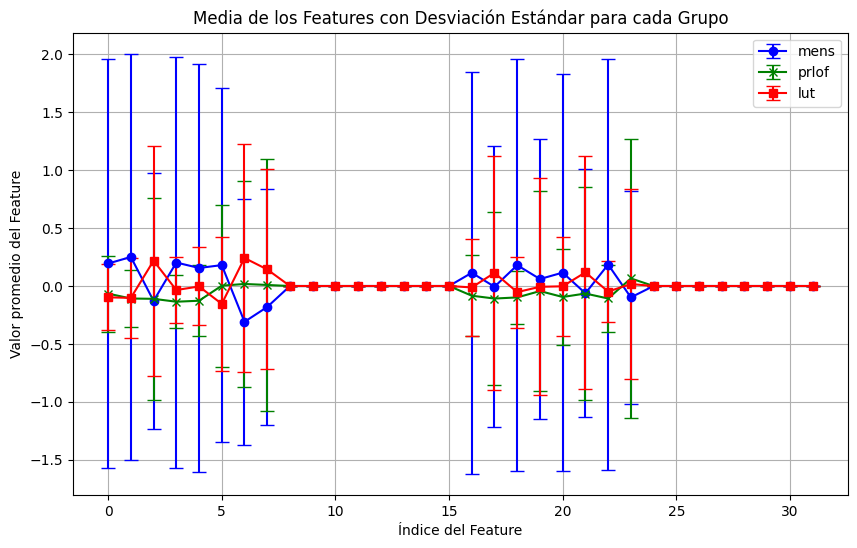

In [13]:
import numpy as np
import matplotlib.pyplot as plt

std_grupo_1 = np.std(grupo_1, axis=0)
std_grupo_2 = np.std(grupo_2, axis=0)
std_grupo_3 = np.std(grupo_3, axis=0)

# Gráfica de las medias de cada feature para los 3 grupos con barras de error
plt.figure(figsize=(10, 6))

# Graficar las medias de los features para cada grupo con barras de error (desviación estándar)
plt.errorbar(range(len(media_grupo_1)), media_grupo_1, yerr=std_grupo_1, marker='o', label='mens', color='blue', capsize=5)
plt.errorbar(range(len(media_grupo_2)), media_grupo_2, yerr=std_grupo_2, marker='x', label='prlof', color='green', capsize=5)
plt.errorbar(range(len(media_grupo_3)), media_grupo_3, yerr=std_grupo_3, marker='s', label='lut', color='red', capsize=5)

# Configuración de la gráfica
plt.xlabel('Índice del Feature')
plt.ylabel('Valor promedio del Feature')
plt.title('Media de los Features con Desviación Estándar para cada Grupo')
plt.legend()
plt.grid(True)

# Mostrar la gráfica
plt.show()


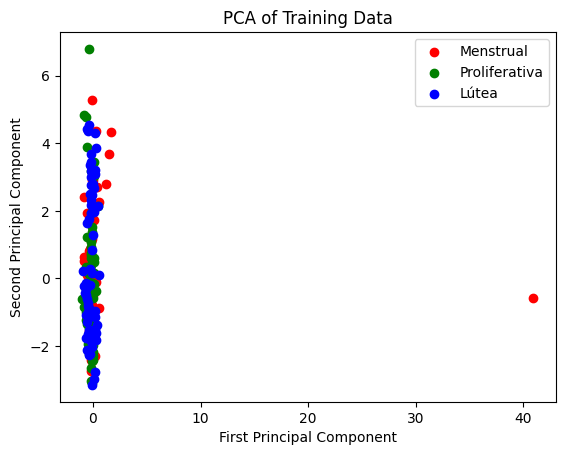

In [14]:
# graficamos nuestra data a ver cómo se comporta

import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_train_scaled)

# Configurar los colores y etiquetas para cada grupo
colors = ['r', 'g', 'b']  # Elige los colores que representarán a los grupos
labels = ['Menstrual', 'Proliferativa', 'Lútea']  # Nombres de los grupos
unique_labels = np.unique(y_train)  # Obtener los grupos únicos

# Graficar y agregar la leyenda
for i, label in enumerate(unique_labels):
    plt.scatter(X_pca[y_train == label, 0], X_pca[y_train == label, 1],
                color=colors[i], label=labels[i])

plt.title('PCA of Training Data')
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.legend()
plt.show()


In [15]:
# este es para buscar los mejores parámetros para el svm.

from sklearn.model_selection import GridSearchCV
from sklearn import svm

# Definir el grid de hiperparámetros
param_grid = {
    'C': [0.1, 1, 10, 100],
    'gamma': [1, 0.1, 0.01, 0.001],
    'kernel': ['rbf', 'poly', 'linear']
}

# Inicializar el modelo GridSearchCV con SVC
grid = GridSearchCV(svm.SVC(), param_grid, refit=True, verbose=2)

# Entrenar el modelo con los datos originales (X_train_scaled)
grid.fit(X_train_scaled, y_train)

# Entrenar el modelo con los datos PCA (X_pca)
grid_pca = GridSearchCV(svm.SVC(), param_grid, refit=True, verbose=2)
grid_pca.fit(X_pca, y_train)

# Mostrar los mejores parámetros y puntajes para cada caso
print("Mejores hiperparámetros (X_train_scaled):", grid.best_params_)
print("Mejor puntaje (X_train_scaled):", grid.best_score_)

print("Mejores hiperparámetros (X_pca):", grid_pca.best_params_)
print("Mejor puntaje (X_pca):", grid_pca.best_score_)



Fitting 5 folds for each of 48 candidates, totalling 240 fits
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.1s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ........................C=0.1, gamma=1, kernel=poly; total time=   0.0s
[CV] END ........................C=0.1, gamma=1, kernel=poly; total time=   0.0s
[CV] END ........................C=0.1, gamma=1, kernel=poly; total time=   0.0s
[CV] END ........................C=0.1, gamma=1, kernel=poly; total time=   0.0s
[CV] END ........................C=0.1, gamma=1, kernel=poly; total time=   0.0s
[CV] END ......................C=0.1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ......................C=0.1, gamma=1, 

In [16]:
classifier = svm.SVC() # mejor version:
# classifier = svm.SVC(kernel='rbf', gamma=0.1, C=100)
# classifier = svm.SVC(kernel='poly', degree=3, C=0.01)
# classifier = svm.SVC(kernel='linear')

classifier.fit(X_train_scaled, y_train)
y_predict = classifier.predict(X_test_scaled)

In [17]:
metrics.accuracy_score(y_test, y_predict)

0.45714285714285713

In [18]:
y_predict2 = grid.predict(X_test_scaled)

accuracy = metrics.accuracy_score(y_test, y_predict2)
print(f"Accuracy: {accuracy}")

Accuracy: 0.5


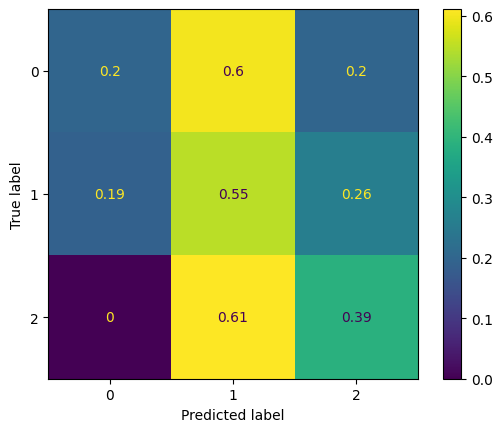

In [19]:
conf_mat = metrics.confusion_matrix(y_test, y_predict, normalize="true")
plot = metrics.ConfusionMatrixDisplay(conf_mat)
plot.plot()

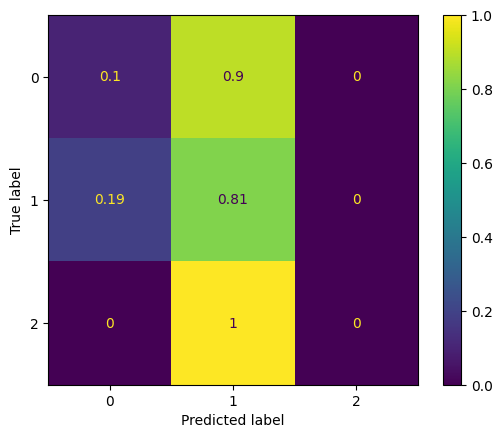

In [20]:
conf_mat = metrics.confusion_matrix(y_test, y_predict2, normalize="true")
plot = metrics.ConfusionMatrixDisplay(conf_mat)
plot.plot()

In [21]:
classif = svm.SVC()
classif.fit(X_pca, y_train)

X_test_pca = pca.transform(X_test_scaled)  # Asegúrate de transformar tu conjunto de prueba

y_pred = classif.predict(X_test_pca)  # Predecir con el modelo entrenado en los datos transformados

accuracy = metrics.accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")


Accuracy: 0.4857142857142857


In [22]:
y_pred2 = grid_pca.predict(X_test_pca)
accuracy = metrics.accuracy_score(y_test, y_pred2)
print(f"Accuracy: {accuracy}")

Accuracy: 0.4857142857142857


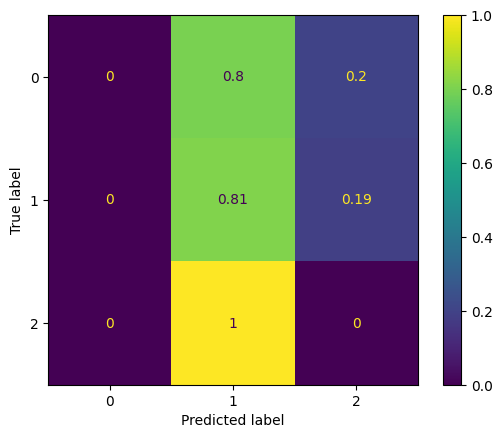

In [23]:
conf_mat = metrics.confusion_matrix(y_test, y_pred, normalize="true")
plot = metrics.ConfusionMatrixDisplay(conf_mat)
plot.plot()

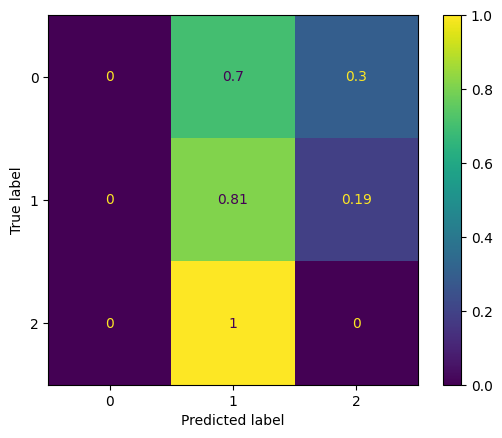

In [24]:
conf_mat = metrics.confusion_matrix(y_test, y_pred2, normalize="true")
plot = metrics.ConfusionMatrixDisplay(conf_mat)
plot.plot()

Ojo, puede que cross validation esté muy sobreajustado por estar usando a los mismos sujetos, quizá es mejor hacer los folds a mano

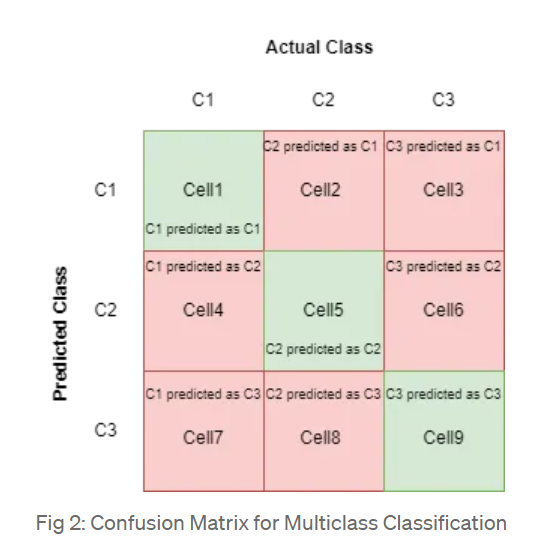

In [25]:
# Para hacer cross-validation:
from sklearn.model_selection import GroupKFold
import numpy as np

# Número total de grupos
n_groups = X.shape[0]/3

# Crear el array repitiendo cada número 3 veces
groups = np.repeat(np.arange(n_groups), 3) # ponemos aquí nuestros 200 sujetos

#
# Para que esto funcione debo definir X e y al inicio  !!!!!!!!!!!!!!!
#

# Definir GroupKFold
gkf = GroupKFold(n_splits=3) # número de folds

In [26]:
print(X, y)

     cortical_mean_4  cortical_mean_5  cortical_mean_6  cortical_mean_11  \
0           1.000000         1.000000         0.000000          1.000000   
1           0.100664         0.094352         0.106090          0.116728   
2           0.112314         0.098030         0.109451          0.117455   
3           0.116644         0.097421         0.105420          0.110328   
4           0.138916         0.162273         0.128460          0.138647   
..               ...              ...              ...               ...   
278         0.123669         0.091690         0.094097          0.109372   
279         0.117235         0.081955         0.086162          0.118741   
280         0.087513         0.094301         0.110220          0.129268   
281         0.085696         0.090695         0.105494          0.127975   
282         0.088367         0.091959         0.104072          0.125800   

     cortical_mean_12  cortical_mean_13  cortical_mean_21  cortical_mean_31  \
0       

In [27]:
from sklearn.metrics import classification_report

# Iterar sobre los splits
for train_idx, test_idx in gkf.split(X, y, groups):
    # Dividir los datos de entrenamiento y prueba
    X_train2, X_test2 = X.loc[train_idx], X.loc[test_idx]
    y_train2, y_test2 = y.loc[train_idx], y.loc[test_idx]
    classif.fit(X_train2, y_train2)
    y_pred = classif.predict(X_test)
    print(classification_report(y_test, y_pred))
    conf_mat = metrics.confusion_matrix(y_test, y_pred2, normalize="true")
    plot = metrics.ConfusionMatrixDisplay(conf_mat)
    plot.plot()

ValueError: Found input variables with inconsistent numbers of samples: [283, 283, 285]

In [ ]:
from sklearn.model_selection import cross_val_score
clf = svm.SVC(kernel='linear', C=1, random_state=42)
scores = cross_val_score(clf, X, y, cv=5)
scores

In [ ]:
print("%0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))

# Random Forest:

Probaremos ahora con otro modelo

In [28]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

random_forest = RandomForestClassifier(n_estimators=100, random_state=42)
random_forest.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [29]:
y_pred = random_forest.predict(X_test)

# Imprimir los resultados de las métricas
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.38571428571428573
Classification Report:
               precision    recall  f1-score   support

           0       0.19      0.40      0.26        10
           1       0.63      0.40      0.49        42
           2       0.27      0.33      0.30        18

    accuracy                           0.39        70
   macro avg       0.36      0.38      0.35        70
weighted avg       0.48      0.39      0.41        70



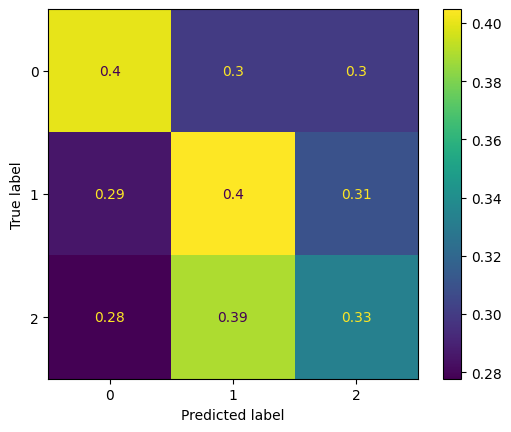

In [30]:
conf_mat = metrics.confusion_matrix(y_test, y_pred, normalize="true")
plot = metrics.ConfusionMatrixDisplay(conf_mat)
plot.plot()

In [31]:
# Obtener las importancias de cada feature
importances = random_forest.feature_importances_

# Crear un DataFrame para visualizar mejor las importancias
feature_names = X.columns  # Asumiendo que X es un DataFrame con los nombres de los ROIs
importances_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})

# Ordenar de mayor a menor importancia
importances_df = importances_df.sort_values(by='Importance', ascending=False)

# Imprimir las características más importantes
print(importances_df.head(10))  # Las 10 características más importantes

                Feature  Importance
18   subcortical_mean_9    0.076073
3      cortical_mean_11    0.071125
6      cortical_mean_21    0.067318
1       cortical_mean_5    0.066851
4      cortical_mean_12    0.066308
17   subcortical_mean_5    0.065267
22  subcortical_mean_19    0.063627
19  subcortical_mean_10    0.062783
7      cortical_mean_31    0.061549
0       cortical_mean_4    0.060379


In [32]:
pip install tensorflow

In [33]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical

# Codificar las etiquetas (labels)
encoder = LabelEncoder()
y_encoded = encoder.fit_transform(y)

# Convertir las etiquetas a one-hot encoding (ya que son 3 clases)
y_onehot = to_categorical(y_encoded)

# Dividir en sets de entrenamiento y prueba (X_train, X_test, y_train, y_test)
X_train1, X_test1, y_train1, y_test1 = train_test_split(X, y_onehot, test_size=0.2, random_state=42)

# Estandarizar los datos (normalizar los features)
scaler = StandardScaler()
X_train_scaled1 = scaler.fit_transform(X_train1)
X_test_scaled1 = scaler.transform(X_test1)

# Crear el modelo de red neuronal
model = Sequential()
model.add(Dense(64, input_dim=X_train_scaled1.shape[1], activation='relu'))  # Capa de entrada
model.add(Dense(32, activation='relu'))  # Capa oculta
model.add(Dense(3, activation='softmax'))  # Capa de salida (tres clases)

# Compilar el modelo
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Entrenar el modelo
history = model.fit(X_train_scaled1, y_train1, epochs=50, batch_size=16, validation_data=(X_test_scaled1, y_test1))

# Evaluar el modelo en el set de prueba
loss, accuracy = model.evaluate(X_test_scaled1, y_test1)
print(f"Precisión del modelo en el set de prueba: {accuracy * 100:.2f}%")

# Hacer predicciones con el modelo entrenado
predicciones = model.predict(X_test_scaled)


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - accuracy: 0.3316 - loss: 1.1040 - val_accuracy: 0.4386 - val_loss: 1.0768
Epoch 2/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.4623 - loss: 1.0570 - val_accuracy: 0.4561 - val_loss: 1.0678
Epoch 3/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.5110 - loss: 1.0383 - val_accuracy: 0.4561 - val_loss: 1.0605
Epoch 4/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.5689 - loss: 1.0120 - val_accuracy: 0.4737 - val_loss: 1.0483
Epoch 5/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.5125 - loss: 1.0367 - val_accuracy: 0.4912 - val_loss: 1.0413
Epoch 6/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.5700 - loss: 1.0035 - val_accuracy: 0.5088 - val_loss: 1.0347
Epoch 7/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.5722 - loss: 0.9849 - val_accuracy: 0.5439 - val_loss: 1.0318
Epoch 8/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.6051 - loss: 0.9611 - val_accuracy: 0.5263 - va

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
Matriz de confusión:
[[ 7  6  1]
 [ 2 16  5]
 [ 3  7 10]]


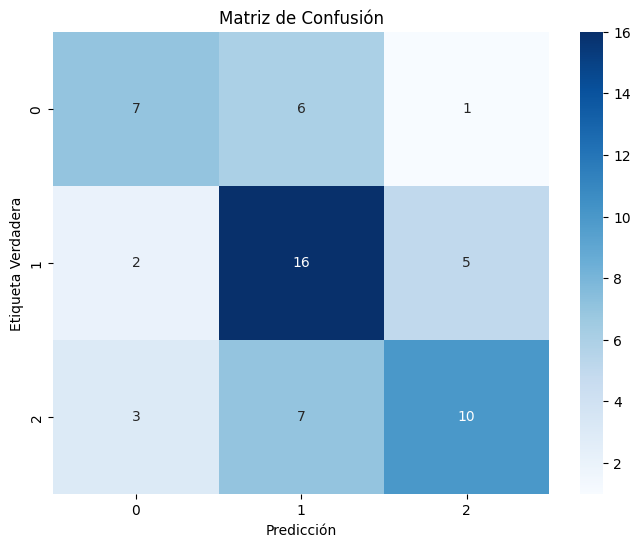

In [34]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

# Hacer predicciones en el set de prueba
predicciones = model.predict(X_test_scaled1)

# Convertir las predicciones de one-hot encoding a clases
y_pred_classes = np.argmax(predicciones, axis=1)

# Convertir las etiquetas verdaderas (y_test) de one-hot encoding a clases
y_true_classes = np.argmax(y_test1, axis=1)

# Generar la matriz de confusión
conf_matrix = confusion_matrix(y_true_classes, y_pred_classes)

# Imprimir la matriz de confusión
print("Matriz de confusión:")
print(conf_matrix)

# Visualizar la matriz de confusión usando seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=encoder.classes_, yticklabels=encoder.classes_)
plt.xlabel('Predicción')
plt.ylabel('Etiqueta Verdadera')
plt.title('Matriz de Confusión')
plt.show()



In [35]:
# Codificar las etiquetas (labels)
encoder = LabelEncoder()
y_encoded_test = encoder.fit_transform(y_test)
y_encoded_train = encoder.fit_transform(y_train)

# Estandarizar los datos (normalizar los features)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

y_onehot_test = to_categorical(y_encoded_test)
y_onehot_train = to_categorical(y_encoded_train)

# Crear el modelo de red neuronal
model = Sequential()
model.add(Dense(64, input_dim=X_train_scaled1.shape[1], activation='relu'))  # Capa de entrada
model.add(Dense(32, activation='relu'))  # Capa oculta
model.add(Dense(3, activation='softmax'))  # Capa de salida (tres clases)

# Compilar el modelo
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Entrenar el modelo
history = model.fit(X_train_scaled, y_onehot_train, epochs=50, batch_size=16, validation_data=(X_test_scaled, y_onehot_test))

# Evaluar el modelo en el set de prueba
loss, accuracy = model.evaluate(X_test_scaled, y_onehot_test)
print(f"Precisión del modelo en el set de prueba: {accuracy * 100:.2f}%")

# Hacer predicciones con el modelo entrenado
predicciones = model.predict(X_test_scaled)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 4s 31ms/step - accuracy: 0.3468 - loss: 1.1181 - val_accuracy: 0.4000 - val_loss: 1.1368
Epoch 2/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.4638 - loss: 1.0634 - val_accuracy: 0.3714 - val_loss: 1.1946
Epoch 3/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.4684 - loss: 1.0663 - val_accuracy: 0.3857 - val_loss: 1.1767
Epoch 4/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5656 - loss: 1.0021 - val_accuracy: 0.3857 - val_loss: 1.1884
Epoch 5/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6064 - loss: 0.9927 - val_accuracy: 0.3429 - val_loss: 1.1720
Epoch 6/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6325 - loss: 0.9562 - val_accuracy: 0.3000 - val_loss: 1.1802
Epoch 7/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7079 - loss: 0.9130 - val_accuracy: 0.2857 - val_loss: 1.1972
Epoch 8/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.6748 - loss: 0.9188 - val_accuracy: 0.2857 - val_loss

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
Matriz de confusión:
[[ 3  5  2]
 [16 17  9]
 [ 1  4 13]]


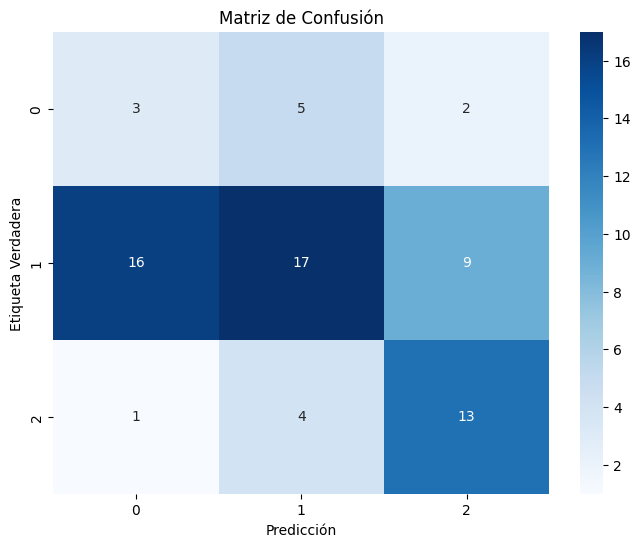

Reporte de clasificación:
              precision    recall  f1-score   support

           0       0.15      0.30      0.20        10
           1       0.65      0.40      0.50        42
           2       0.54      0.72      0.62        18

    accuracy                           0.47        70
   macro avg       0.45      0.48      0.44        70
weighted avg       0.55      0.47      0.49        70



In [36]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

# Hacer predicciones en el set de prueba
predicciones = model.predict(X_test_scaled)

# Convertir las predicciones de one-hot encoding a clases
y_pred_classes = np.argmax(predicciones, axis=1)

# Convertir las etiquetas verdaderas (y_test) de one-hot encoding a clases
y_true_classes = np.argmax(y_onehot_test, axis=1)

# Generar la matriz de confusión
conf_matrix = confusion_matrix(y_true_classes, y_pred_classes)

# Imprimir la matriz de confusión
print("Matriz de confusión:")
print(conf_matrix)

# Visualizar la matriz de confusión usando seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=encoder.classes_, yticklabels=encoder.classes_)
plt.xlabel('Predicción')
plt.ylabel('Etiqueta Verdadera')
plt.title('Matriz de Confusión')
plt.show()


In [41]:
men = 20*3
prlof = 20*3 #int(len(data_pr)*0.7)
lut = 20*3 #int(len(data_lut)*0.7)

# 3. Tomar solo el primer tercio de cada grupo
data_men_train2 = data_men.iloc[:men]
data_pro_train2 = data_pr.iloc[:prlof]
data_lut_train2 = data_lut.iloc[:lut]

data_men_test2 = data_men.iloc[men:]
data_pro_test2 = data_pr.iloc[prlof:]
data_lut_test2 = data_lut.iloc[lut:]

data_pro_train2 = data_pro_train2.drop(columns=['group'])
data_lut_train2 = data_lut_train2.drop(columns=['group'])
data_pro_train2['group'] = '0'
data_lut_train2['group'] = '1'

data_pro_test2 = data_pro_test2.drop(columns=['group'])
data_lut_test2 = data_lut_test2.drop(columns=['group'])
data_pro_test2['group'] = '0'
data_lut_test2['group'] = '1'

# 5. Concatenar todos los datos en un solo DataFrame
df_all_train2 = pd.concat([data_men_train2, data_pro_train2, data_lut_train2], ignore_index=True)
df_all_test2 = pd.concat([data_men_test2, data_pro_test2, data_lut_test2], ignore_index=True)

# 6. Definir las características (X) y la etiqueta/grupo (y)
X_train2 = df_all_train2.drop(columns=['group'])  # Eliminar la columna de grupo para usar solo las features
y_train2 = df_all_train2['group']  # Esta será nuestra etiqueta


X_test2 = df_all_test2.drop(columns=['group'])  # Eliminar la columna de grupo para usar solo las features
y_test2 = df_all_test2['group']  # Esta será nuestra etiqueta



In [42]:
import numpy as np

# Asegúrate de que los índices de y_train y X_train_scaled coincidan
y_train2 = y_train2.reset_index(drop=True)

# Escalar los datos de X_train
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled2 = scaler.fit_transform(X_train2)

# Convertir X_train_scaled a DataFrame para facilitar la manipulación de índices
X_train_scaled2 = pd.DataFrame(X_train_scaled2)
X_test_scaled2 = scaler.transform(X_test2)


In [43]:
classifier = svm.SVC() # mejor version:
# classifier = svm.SVC(kernel='rbf', gamma=0.1, C=100)
# classifier = svm.SVC(kernel='poly', degree=3, C=0.01)
# classifier = svm.SVC(kernel='linear')

classifier.fit(X_train_scaled2, y_train2)
y_predict2 = classifier.predict(X_test_scaled2)

In [44]:
metrics.accuracy_score(y_test2, y_predict2)

0.6990291262135923

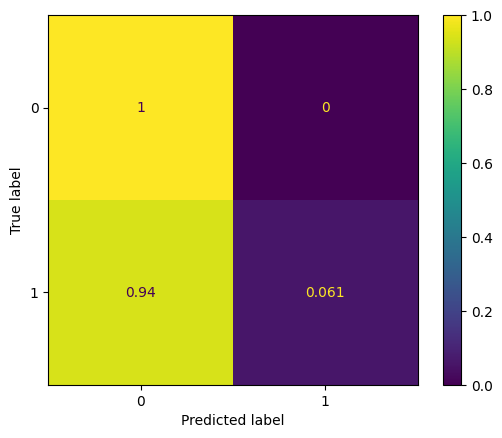

In [45]:
conf_mat = metrics.confusion_matrix(y_test2, y_predict2, normalize="true")
plot = metrics.ConfusionMatrixDisplay(conf_mat)
plot.plot()

In [46]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

random_forest = RandomForestClassifier(n_estimators=100, random_state=42)
random_forest.fit(X_train2, y_train2)

RandomForestClassifier(random_state=42)

In [47]:
y_pred2 = random_forest.predict(X_test2)

# Imprimir los resultados de las métricas
print("Accuracy:", accuracy_score(y_test2, y_pred2))
print("Classification Report:\n", classification_report(y_test2, y_pred2))

Accuracy: 0.6796116504854369
Classification Report:
               precision    recall  f1-score   support

           0       0.70      0.91      0.80        70
           1       0.50      0.18      0.27        33

    accuracy                           0.68       103
   macro avg       0.60      0.55      0.53       103
weighted avg       0.64      0.68      0.63       103



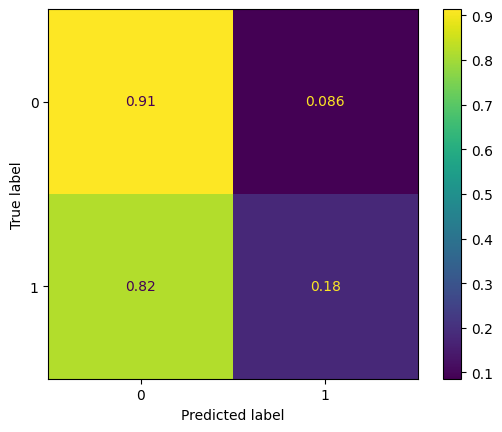

In [48]:
conf_mat = metrics.confusion_matrix(y_test2, y_pred2, normalize="true")
plot = metrics.ConfusionMatrixDisplay(conf_mat)
plot.plot()

In [49]:
# Codificar las etiquetas (labels)
encoder = LabelEncoder()
y_encoded_test2 = encoder.fit_transform(y_test2)
y_encoded_train2 = encoder.fit_transform(y_train2)

# Estandarizar los datos (normalizar los features)
scaler = StandardScaler()
X_train_scaled2 = scaler.fit_transform(X_train2)
X_test_scaled2 = scaler.transform(X_test2)

y_onehot_test2 = to_categorical(y_encoded_test2)
y_onehot_train2 = to_categorical(y_encoded_train2)

print(y_onehot_test2)
print(y_onehot_train2)

[[1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]]
[[1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]


In [50]:

# Crear el modelo de red neuronal
model = Sequential()
model.add(Dense(64, input_dim=X_train_scaled2.shape[1], activation='relu'))  # Capa de entrada
model.add(Dense(32, activation='relu'))  # Capa oculta
model.add(Dense(2, activation='softmax'))  # Capa de salida (tres clases)

# Compilar el modelo
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Entrenar el modelo
history = model.fit(X_train_scaled2, y_onehot_train2, epochs=50, batch_size=16, validation_data=(X_test_scaled2, y_onehot_test2))

# Evaluar el modelo en el set de prueba
loss, accuracy = model.evaluate(X_test_scaled2, y_onehot_test2)
print(f"Precisión del modelo en el set de prueba: {accuracy * 100:.2f}%")

# Hacer predicciones con el modelo entrenado
predicciones = model.predict(X_test_scaled2)

Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - accuracy: 0.4878 - loss: 0.6958 - val_accuracy: 0.6214 - val_loss: 0.6745
Epoch 2/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7128 - loss: 0.6063 - val_accuracy: 0.6699 - val_loss: 0.6657
Epoch 3/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6793 - loss: 0.6096 - val_accuracy: 0.6796 - val_loss: 0.6528
Epoch 4/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7647 - loss: 0.5511 - val_accuracy: 0.6699 - val_loss: 0.6497
Epoch 5/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7255 - loss: 0.5571 - val_accuracy: 0.6699 - val_loss: 0.6505
Epoch 6/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7016 - loss: 0.5639 - val_accuracy: 0.6796 - val_loss: 0.6314
Epoch 7/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7604 - loss: 0.5127 - val_accuracy: 0.6796 - val_loss: 0.6353
Epoch 8/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7257 - loss: 0.5213 - val_accuracy: 0.6796 - val_loss: 0.6367
Ep

1/4 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
Matriz de confusión:
[[59 11]
 [25  8]]


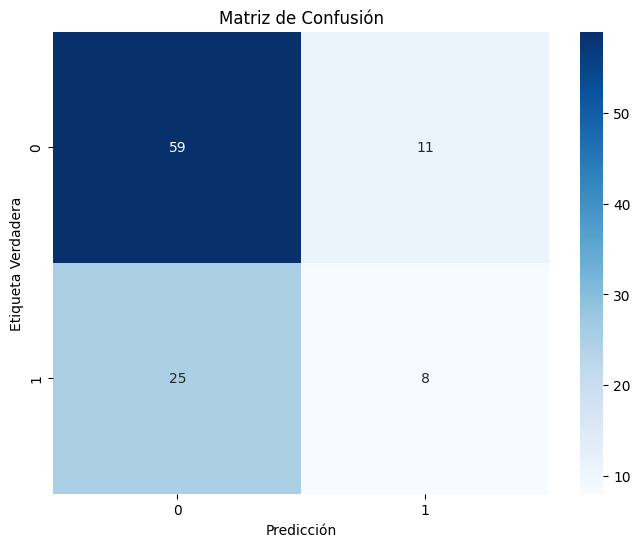

In [51]:
# Hacer predicciones en el set de prueba
predicciones = model.predict(X_test_scaled2)

# Convertir las predicciones de one-hot encoding a clases
y_pred_classes = np.argmax(predicciones, axis=1)

# Convertir las etiquetas verdaderas (y_test) de one-hot encoding a clases
y_true_classes = np.argmax(y_onehot_test2, axis=1)

# Generar la matriz de confusión
conf_matrix = confusion_matrix(y_true_classes, y_pred_classes)

# Imprimir la matriz de confusión
print("Matriz de confusión:")
print(conf_matrix)

# Visualizar la matriz de confusión usando seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=encoder.classes_, yticklabels=encoder.classes_)
plt.xlabel('Predicción')
plt.ylabel('Etiqueta Verdadera')
plt.title('Matriz de Confusión')
plt.show()